# 02 Supervised Learning -- Regression

Author: Murthadza bin Aznam <br/>
Date: 3rd August 2021<br/>

This Notebook is written as part of the International Virtual Conference on Astrostatistics and Machine Learning (IVCASML2021) course.

---

## 0.0 GOAL
1. To test a linear regression model used by scikit-learn using a randomly generated data
2. To use that linear regression model to identify the relationship between Temperature and Conductance

---

## TASK A | RANDOMLY GENERATED DATA
## A-1.0 PREPARATION

In [26]:
# Importing packages

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

%matplotlib inline

### A-1.1 DATA PREPARATION

We are going to create a linear plot with some noise
$$y = mx + c + \text{noise}$$

In [22]:
# Variables go here
sample_size = 100000 # The higher the sample size, the better
slope = 5
y_intercept = 0

fuzziness = 10.0 # Sets the noise level

# Generates a random data set with random noise
x_obs = np.random.uniform(low=0.0, high=100.0, size=sample_size)
noise = np.random.normal(loc=0.0, scale=fuzziness, size=sample_size)

# Creates a linear relationship with noisy data
y_obs = slope*x_obs + y_intercept + noise

## A-2.0 SCIKIT-LEARN LINEAR REGRESSION

### A-2.1 DATA RESHAPING
In order to feed the data into scikit-learn, it must first be reshaped

In [23]:
# Reformatting the data to feed into sklearn
x = x_obs.reshape(-1,1)

y = y_obs.reshape(-1,1)

### A-2.2 USING SCIKIT-LEARN
We can see that the values we get from scikit-learn is close with the value we have set

In [24]:
# Using the LinearRegression class from sklearn
model = LinearRegression()

model.fit(x, y)

print("The model predicts that the slope coefficient is: ", model.coef_)
print("The real slope coefficient is: ", slope)
print("---")
print("The model predicts that the intercept is: ", model.intercept_)
print("The real intercept is: ", y_intercept)

The model predicts that the slope coefficient is:  [[4.99930462]]
The real slope coefficient is:  5
---
The model predicts that the intercept is:  [0.02131125]
The real intercept is:  0


## TASK B | LINEAR RELATIONSHIP OF TEMPERATURE AND CONDUCTANCE
### B-1.0 PREPARATION
The data for this notebook is from `Temp_vs_Cond.csv`

In [25]:
df = pd.read_csv('../dataset/Temp_vs_Cond.csv')

df

,Temperature,Conductance
0,300,0.084
1,400,0.098
2,500,0.109
3,600,0.120
4,700,0.127


Text(0.5, 1.0, 'Temperature vs Conductance')

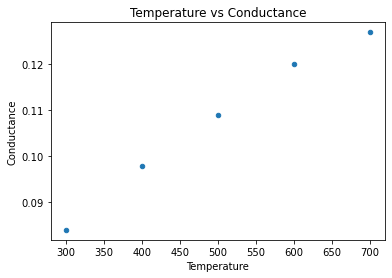

In [28]:
df.plot(kind='scatter', x='Temperature',y='Conductance')
plt.xlabel('Temperature')
plt.ylabel('Conductance')
plt.title('Temperature vs Conductance')

## B-2.0 USING SCIKIT-LEARN

### B-2.1 FITTING THE DATA
We reshape the data and use linear regression

In [30]:
# Reshape data
T = df['Temperature'].to_numpy().reshape(-1,1)
C = df['Conductance'].to_numpy()

# Setup Linear Regression
lr = LinearRegression()
lr.fit(T,C)
print('Coefficients =', lr.coef_)
print('Intercept =',lr.intercept_)

Coefficients = [0.000108]
Intercept = 0.05359999999999999


### B-2.1 PLOTTING

Text(0.5, 1.0, 'Prediction against data')

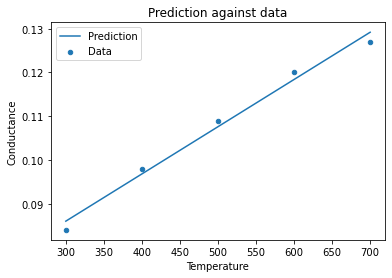

In [33]:
x = np.linspace(df['Temperature'].min(),df['Temperature'].max())
prediction = lr.coef_[0]*x + lr.intercept_

df.plot(kind='scatter', x='Temperature',y='Conductance', label="Data")
plt.plot(x, prediction, label="Prediction")
plt.legend()
plt.title("Prediction against data")